# Chapter X: Building a mechanistic model with the Antimony language 

<div align='center'>
    <figure>
        <img src="" width = "50%" style="padding: 0px">
        <figcaption>Model construction requires several stages including data aggregation, annotation and creation of a mathematical representation of the system which can be represented in a computational environment.</figcaption>
    </figure>
</div>
<br>



## Data aggregation

Most biochemical models require inputs gathered by data aggregation or the collection of data from multiple experiments, scientific papers, and online data sources. Appendix A of Goldberg et al. [add citations] provides an extensive list of data sources that store intracellular biochemical data. If experiments are conducted to obtain new data or inform conditions studied by the model, use reproducible experimental methods. We encourage experimentalists to use appropriate ontologies and minimum information standards when recording experimental methods, conditions, and the historical record of the data [add citations]. Provide thorough descriptions of statistical analyses and estimated uncertainties in measurements that are due to instrument accuracy and other sources of noise [add citations]. Data curation standardizes, normalizes, and links together the aggregated data to facilitate its use in models and manages its metadata [add citations]. Metadata are data that describe data, in this case, data used by biochemical models [add citations]. Metadata about a measurement should include its units, estimates of its accuracy, annotations, and the identities of the ontologies that define the annotations. This will provide information that a modeler can use to evaluate whether data are suitable for their model. Data provenance is metadata that describes the historical record of data and should include the lab that generated the data, the conditions under which it was obtained, the protocol used to make it, the paper that reported the measurement, and the online data source from which it was aggregated [add citations]. Provenance records should also describe transformations of the data following their collection. Follow the scientific evidence and provenance information OntologySEPIO to provide rich, computable representations of the evidence and provenance behind scientific assertions [add citations].

A limited set of existing tools can track the versions, metadata, and provenance of aggregated data. For example, Quilt provides version control features for data, and PROV [add citations] is an extensive data model for tracking the provenance of online data, such as data sources. Over fifty tools have implemented parts of PROV [add citations]. When aggregating data, modelers should automate the processes that retain its metadata and provenance. If existing tools cannot perform the automation, then custom tools must be developed.

Several databases exist which can assit with the data curation process for biochemical models.

<ul>
  <li>SABIO-RK: biochemical reaction kinetics database</li>
     <ul class="square">
      <li>Describes chemical reactions and kinetics</li>
      <li>Contains information about participants and modifiers in reactions</li>
      <li>Metabolic and signaling network reactions</li>
     </ul>
  <li>BRENDA: the comprehensive enzyme information system</li>
     <ul class="square">
      <li>Enzyme information classified by the biochemical reaction it catalyzes</li>
      <li>Kinetic information about substrates and products is available</li> 
     </ul>
  <li>ChEBI: dictionary of "small" chemical compounds</li>
  <li>KEGG: collection of pathway/genome/diesease/drug databases</li>
  <li>BioCYC: collection of pathway/genome databases</li>
       <ul class="square">
      <li>Search for genes, proteins, metabolites or pathways, and the occurence of your term will be located in multiple databases</li> 
     </ul>
  <li>BioModel: repository of mathematical models of biological systems</li>
      <ul class="square">
      <li> *Will be covered in more detail later in the course</li> 
     </ul>
</ul>



<ul>
  <li>Metadata, data that describes biochemical data, which may be collected:</li>
     <ul class="square">
      <li>Units</li>
      <li>Estimates of measurement accuracy</li>
      <li>Annotations</li>
      <li>Ontology terms defining the annotations</li>
      <li>etc.</li>
     </ul>
  <li>Collect provenance data:</li>
     <ul class="square">
      <li>Lab which generated the data</li>
      <li>Experimental conditions</li>
      <li>Protocol used to generate the data</li>
      <li>Paper which reported the measurement</li>
      <li>etc.</li>

## Aggregating data with SABIO-RK

In [8]:
import requests
import io
import pandas as pd

QUERY_URL = 'http://sabiork.h-its.org/sabioRestWebServices/kineticlawsExportTsv'

# Specify search fields and search terms
query_dict = {"Organism":'"saccharomyces cerevisiae"', "Product":'"glycerol"'}
query_string = ' AND '.join(['%s:%s' % (k,v) for k,v in query_dict.items()])

# Specify output fields and send request
query = {'fields[]':['Parameter'], 'q':query_string}
#query = {'fields[]':['EntryID', 'UniprotID','ECNumber', 'Parameter'], 'q':query_string}
request = requests.post(QUERY_URL, params = query)
request.raise_for_status()

# Print query results
print('\nThe results of SABIO-RK query for the formation of glycerol in saccharomyces cervisiae:\n')
print(request.text)
data_string = request.text
data = io.StringIO(data_string)
df = pd.read_csv(data, sep="\t")

parameter_types = list(df['parameter.type'])
if 'rate const.' or 'Km' in parameter_types:
    k7 = list(df['parameter.startValue'])[parameter_types.index('rate const.')]
    k7_units = list(df['parameter.unit'])[parameter_types.index('rate const.')]

print(f"\nThe formation of the glycerol in saccharomyces cervisiae occurs at a rate of {k7:.3f} {k7_units}.")



The results of SABIO-RK query for the formation of spike glycoprotein RBD-SD1-ACE2 complex in SARS coronavirus:

parameter.type	parameter.associatedSpecies	parameter.startValue	parameter.endValue	parameter.standardDeviation	parameter.unit
Km	Glycerol 3-phosphate	0.0035		-	M
concentration	Glycerol 3-phosphate	2.74002929191284E-4		-	M
Vmax		8.83333333333333E-4		-	M*s^(-1)
Km	Glycerone phosphate	4.0E-4		-	M
Keq		4300.0		-	-
Km	NADH	2.3E-5		-	M
concentration	NADH	8.67096979846952E-5		-	M
concentration	NAD+	0.0015032903020153101		-	M
Km	Glycerol	0.001		-	M
concentration	Glycerone phosphate	0.00100415254899644		-	M
concentration	Glycerol	1.5E-4		-	M
Km	NAD+	9.3E-4		-	M
Vmax		47.11		-	-
volume				-	-



NameError: name 'k7' is not defined

In [12]:
parameter_types = list(df['parameter.type'])
if 'Km' in parameter_types:
    for 
    k7 = list(df['parameter.startValue'])[parameter_types.index('Km')]
    k7_units = list(df['parameter.unit'])[parameter_types.index('Km')]

print(k7)

['Km', 'concentration', 'Vmax', 'Km', 'Keq', 'Km', 'concentration', 'concentration', 'Km', 'concentration', 'concentration', 'Km', 'Vmax', 'volume']
0.0035


## Building a model of biochemical reaction kinetics

Construction (of a model) encodes the structure and dynamics of the biological system being modeled: its geometry; molecular species that participate in the system, the reactions that transform them, and the rate laws for these reactions, initial conditions, and parameters used by these model components. Other biological or biochemical features may also be represented. Document the construction process to ensure that the justification for design decisions, which are not explicitly encoded in the logic or mathematics of the model, is communicated to independent researchers. This includes simplifications and assumptions about the system and environmental context and decisions about which measurements to use.

Many of the artifacts created during model construction will change as the data and models are improved and altered. We recommend that modelers use version control systems to track changes in their data and code. This would support concurrent development by teams of modelers and help avoid unnecessary duplication of artifacts. Version control system tools include subversion (SVN) and Git. For cloud-based storage of SVN and Git repositories that support version control, use GitHub [add references].

Models can be described using general-purpose programing languages. Document the code thoroughly with comments that describe the structure of all model components. If possible, describe the components of models as data rather than in code. For example, the types of molecules in a model could be described in a computer-readable table that contains a column for each molecular attribute. Many other model components can be described in similar tables. Storing components in spreadsheets or delimited files and annotating the meaning of all components and fields will help independent investigators comprehend the model. Standard identifiers for biological and chemical species identified in the standards-based section above can be used to name model entities in the general-purpose approach.

Record all the data and software used to construct the model and document the construction process. Help independent investigators understand the model by noting all assumptions and decisions made during construction, with comments in source code or as supplementary documentation for each artifact. When developing figures to visualize the model components and interactions, provide a detailed legend. Follow existing conventions for interaction maps when possible—for example, use standard arrowheads to represent mass transfer or activating interactions between biochemical species, and blunt-end arrowheads to represent repression.

<ul class="roman">
 <li>Speed of the biochemical reaction involved in the network determines evolution of the system</li>
  <li>Factors that influence the rates of reactions must be considered and modeled appropriately</li>
  <ul class="square">
  <li>e.g. the presence of an activator or repressor would change the baseline speed of that reaction</li>
 </ul>
 <li>Consider the mechanisms involved and determine appropriate simplifications</li>
</ul>


<ul class="roman">
 <li>Models which describe how variables in a system evolve over time</li>
 <ul class="square">
  <li>e.g. floating species concentrations</li>
 </ul>
 <li>Quantities are derived from the variables</li>
  <ul class="square">
  <li>e.g. pathway flux</li>
 </ul>
 <li>Some parameters of the model are fixed by the modeler</li>
   <ul class="square">
  <li>e.g. rate constants</li>
  <li>e.g. enzyme concentrations</li>
  <li>e.g. boundary species concentrations</li>
 </ul>
</ul>

We will use the model of glycolysis, with respiratory oscillations in Saccharomyces cerevisae by <a href="https://www.ebi.ac.uk/biomodels/BIOMD0000000090">Wolf and Heinrich (2000):</a> </div>
<br>

<div align='center'><img src="" width="65%" style="padding: 20px"></div>
<br>
<div align='center'><img src="" width="65%" style="padding: 20px"></div>

## Wolf et. al. (2000) model of glycolysis

Add figures.



// Created by libAntimony v2.12.0
model *Wolf_2000_Glycolysis()

  // Compartments and Species:
  compartment compartment_;
  species Glucose in compartment_, fructose_1_6_bisphosphate in compartment_;
  species glyceraldehyde_3_phosphate in compartment_, glycerate_3_phosphate in compartment_;
  species pyruvate in compartment_, Acetyladehyde in compartment_, External_acetaldehyde in compartment_;
  species ATP in compartment_, ADP in compartment_, $NAD in compartment_;
  species $NADH in compartment_, $External_glucose in compartment_, $Sink in compartment_;

  // Reactions:
  J0: $External_glucose => Glucose; J0_inputFlux;
  J1: Glucose + 2 ATP => fructose_1_6_bisphosphate + 2 ADP; J1_k1*Glucose*ATP*(1/(1 + (ATP/J1_Ki)^J1_n));
  J2: fructose_1_6_bisphosphate => glyceraldehyde_3_phosphate + glyceraldehyde_3_phosphate; J2_k*fructose_1_6_bisphosphate;
  J3: glyceraldehyde_3_phosphate + ADP + $NAD => ATP + glycerate_3_phosphate + $NADH; (J3_kg*J3_kp*glyceraldehyde_3_phosphate*NAD*ADP - J

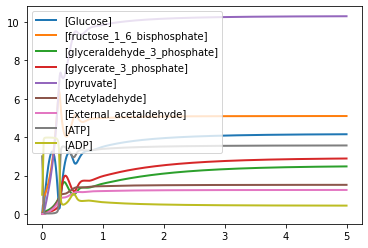

In [18]:
#!pip install --upgrade tellurium
import tellurium as te
wolf = te.loada('v1_Jana_WolfGlycolysis.antimony')
print(wolf.getCurrentAntimony())
data = wolf.simulate(0, 5, 400)
wolf.plot()


## Editing a complex model of a true biological system
<br>
It is common to build upon existing models to enable new analyses...


<br>
<div align='center'><img src="" width="75%" style="padding: 20px"></div>

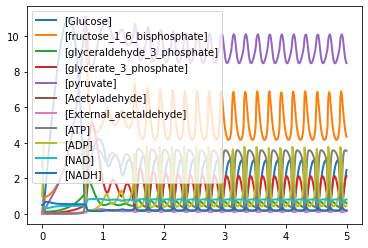

In [22]:
import tellurium as te
antimony_str = '''
// Created by libAntimony v2.12.0
model *Jana_WolfGlycolysis()

  // Compartments and Species:
  compartment compartment_;
  species Glucose in compartment_, fructose_1_6_bisphosphate in compartment_;
  species glyceraldehyde_3_phosphate in compartment_, glycerate_3_phosphate in compartment_;
  species pyruvate in compartment_, Acetyladehyde in compartment_, External_acetaldehyde in compartment_;
  species ATP in compartment_, ADP in compartment_, NAD in compartment_, NADH in compartment_;
  species $External_glucose in compartment_, $ethanol in compartment_, $Glycerol in compartment_;
  species $Sink in compartment_;

  // Reactions:
  J0: $External_glucose => Glucose; J0_inputFlux;
  J1: Glucose + 2 ATP => fructose_1_6_bisphosphate + 2 ADP; J1_k1*Glucose*ATP*(1/(1 + (ATP/J1_Ki)^J1_n));
  J2: fructose_1_6_bisphosphate => glyceraldehyde_3_phosphate + glyceraldehyde_3_phosphate; J2_k*fructose_1_6_bisphosphate;
  J3: glyceraldehyde_3_phosphate + NADH => NAD + $Glycerol; J3_k*glyceraldehyde_3_phosphate*NADH;
  J4: glyceraldehyde_3_phosphate + ADP + NAD => ATP + glycerate_3_phosphate + NADH; (J4_kg*J4_kp*glyceraldehyde_3_phosphate*NAD*ADP - J4_ka*J4_kk*glycerate_3_phosphate*ATP*NADH)/(J4_ka*NADH + J4_kp*ADP);
  J5: glycerate_3_phosphate + ADP => ATP + pyruvate; J5_k*glycerate_3_phosphate*ADP;
  J6: pyruvate => Acetyladehyde; J6_k*pyruvate;
  J7: Acetyladehyde + NADH => NAD + $ethanol; J7_k*Acetyladehyde*NADH;
  J8: Acetyladehyde => External_acetaldehyde; J8_k1*Acetyladehyde - J8_k2*External_acetaldehyde;
  J9: ATP => ADP; J9_k*ATP;
  J10: External_acetaldehyde => $Sink; J10_k*External_acetaldehyde;

  // Species initializations:
  Glucose = 0;
  fructose_1_6_bisphosphate = 0;
  glyceraldehyde_3_phosphate = 0;
  glycerate_3_phosphate = 0;
  pyruvate = 0;
  Acetyladehyde = 0;
  External_acetaldehyde = 0;
  ATP = 3/compartment_;
  ADP = 1/compartment_;
  NAD = 0.5/compartment_;
  NADH = 0.5/compartment_;
  External_glucose = 0;
  ethanol = 0;
  Glycerol = 0;
  Sink = 0;

  // Compartment initializations:
  compartment_ = 1;

  // Variable initializations:
  J0_inputFlux = 50;
  J1_k1 = 550;
  J1_Ki = 1;
  J1_n = 4;
  J2_k = 9.8;
  J3_k = 85.7;
  J4_kg = 323.8;
  J4_kp = 76411.1;
  J4_ka = 57823.1;
  J4_kk = 23.7;
  J5_k = 80;
  J6_k = 9.7;
  J7_k = 2000;
  J8_k1 = 375;
  J8_k2 = 375;
  J9_k = 28;
  J10_k = 80;

  // Other declarations:
  const compartment_, J0_inputFlux, J1_k1, J1_Ki, J1_n, J2_k, J3_k, J4_kg;
  const J4_kp, J4_ka, J4_kk, J5_k, J6_k, J7_k, J8_k1, J8_k2, J9_k, J10_k;
end
'''

wolf = te.loada(antimony_str)
wolf.simulate(0, 5, 400)
wolf.plot()

<br>
<html>
   <head>
      <title>Bibliography</title>
   </head>
   <body>
      <h1>Bibliography</h1>
      <ol>
         <li>
            <p>K. Choi et al., <cite>Tellurium: An extensible python-based modeling environment for systems and synthetic biology</cite>, Biosystems, vol. 171, pp. 74–79, Sep. 2018.</p>
         </li>
         <li>
            <p>E. T. Somogyi et al., <cite>libRoadRunner: a high performance SBML simulation and analysis library.,</cite>, Bioinformatics, vol. 31, no. 20, pp. 3315–21, Oct. 2015.</p>         
          <li>
            <p>L. P. Smith, F. T. Bergmann, D. Chandran, and H. M. Sauro, <cite>Antimony: a modular model definition language</cite>, Bioinformatics, vol. 25, no. 18, pp. 2452–2454, Sep. 2009.</p>
         </li>
         <li>
            <p>K. Choi, L. P. Smith, J. K. Medley, and H. M. Sauro, <cite>phraSED-ML: a paraphrased, human-readable adaptation of SED-ML</cite>, J. Bioinform. Comput. Biol., vol. 14, no. 06, Dec. 2016.</p>
         </li>
         <li>
            <p>J. Wolf, H. Y. Sohn, R. Heinrich, and H. Kuriyama, <cite>Mathematical analysis of a mechanism for autonomous metabolic oscillations in continuous culture of Saccharomyces cerevisiae</cite>, FEBS Lett., vol. 499, no. 3, pp. 230–234, Jun. 2001.</p>
         </li>
      </ol>
   </body>
</html>